In [1]:
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.8/493.8 kB 22.4 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
from konlpy.tag import Okt
import re

In [3]:
# 구글드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/MyDrive/2024_3학년_2학기/데이터마이닝과파이썬프로그래밍/disaster_notifications_titles.csv")
df.head()


,Title
0,"해운대구에서 배회 중인 김민호(남,17세)를 찾습니다-177cm,65kg,상의 검은..."
1,오늘 09시 46분경 거제동 150-8 청마마이우스 오피스텔 14층에서 화재 발생....
2,어등대교(평동에서 시청방항) 2차로 신축이음장치 파손으로 현재 긴급 복구 중으로 교...
3,"서구 주민인 허조배씨(남,79세)를 찾습니다-163cm,53kg,중절모,베이지색점퍼..."
4,"중랑구 주민인 강명운씨(남,82세)를 찾습니다-150cm,60kg,통통,백발,검정패..."


## 불용어 제거

In [5]:
# 불용어 사전 불러오기

# 한글 불용어 사전 파일 경로
stopwords_path = '/content/drive/MyDrive/2024_3학년_2학기/데이터마이닝과파이썬프로그래밍/stopwords-ko.txt'
# 파일 읽기
with open(stopwords_path, "r", encoding="utf-8") as file:
    stopwords = file.readlines()

# 각 불용어의 좌우 공백과 개행문자 제거
stopwords = [word.strip() for word in stopwords]
# 추가 불용어
stopwords.extend(['[', ']'])
print(stopwords)

['!', '"', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '...', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ';', '<', '=', '>', '?', '@', '\\', '^', '_', '`', '|', '~', '·', '—', '——', '‘', '’', '“', '”', '…', '、', '。', '〈', '〉', '《', '》', '가', '가까스로', '가령', '각', '각각', '각자', '각종', '갖고말하자면', '같다', '같이', '개의치않고', '거니와', '거바', '거의', '것', '것과 같이', '것들', '게다가', '게우다', '겨우', '견지에서', '결과에 이르다', '결국', '결론을 낼 수 있다', '겸사겸사', '고려하면', '고로', '곧', '공동으로', '과', '과연', '관계가 있다', '관계없이', '관련이 있다', '관하여', '관한', '관해서는', '구', '구체적으로', '구토하다', '그', '그들', '그때', '그래', '그래도', '그래서', '그러나', '그러니', '그러니까', '그러면', '그러므로', '그러한즉', '그런 까닭에', '그런데', '그런즉', '그럼', '그럼에도 불구하고', '그렇게 함으로써', '그렇지', '그렇지 않다면', '그렇지 않으면', '그렇지만', '그렇지않으면', '그리고', '그리하여', '그만이다', '그에 따르는', '그위에', '그저', '그중에서', '그치지 않다', '근거로', '근거하여', '기대여', '기점으로', '기준으로', '기타', '까닭으로', '까악', '까지', '까지 미치다', '까지도', '꽈당', '끙끙', '끼익', '나', '나머지는', '남들', '남짓', '너', '너희', '너희들', '네', '넷', '년', '논하지 않다', '놀라다', '누가 알겠는가', '누구', '다른', '다른 방면으로', '

In [6]:
# 불용어 처리

# Okt 형태소 분석기 생성
okt = Okt()

# 특수 단어 리스트 정의
special_words = ['확진자', '서울의료원']

# 텍스트 전처리 함수 정의
def preprocess_text_korean(text):
    # 특수 문자 제거
    text = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣\s]', '', text)

    # 형태소 분석 및 불용어 제거
    tokens = okt.pos(text, stem=True)

    # 명사와 동사/형용사만 남기기 및 불용어 제거
    tokens = [word for word, pos in tokens if pos in ['Noun', 'Verb', 'Adjective'] and word not in stopwords]

    # 특정 단어들을 하나의 토큰으로 결합
    for special_word in special_words:
        while special_word in tokens:
            index = tokens.index(special_word)
            tokens[index:index + len(special_word)] = [special_word]

    # 토큰을 다시 문자열로 합침
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

# '송출내용' 열에 전처리 적용
df['preprocessed_text'] = df['Title'].apply(preprocess_text_korean)



In [7]:
# 변경된 내용을 확인하기 위해 데이터프레임의 처음 몇 행 출력
df[['Title', 'preprocessed_text']].head(10)

,Title,preprocessed_text
0,"해운대구에서 배회 중인 김민호(남,17세)를 찾습니다-177cm,65kg,상의 검은...",해운대구 배회 중인 김민호 남다 찾다 상의 검은색 후드 회색 계통 바지 검다 가방 ...
1,오늘 09시 46분경 거제동 150-8 청마마이우스 오피스텔 14층에서 화재 발생....,오늘 시 분경 거 제동 청마 마이 우스 오피스텔 층 화재 발생 차량 건물 주변 도로...
2,어등대교(평동에서 시청방항) 2차로 신축이음장치 파손으로 현재 긴급 복구 중으로 교...,어등 대교 평동 청방 항 차로 신축 이음 장치 파손 현재 긴급 복구 중 교통 매우 ...
3,"서구 주민인 허조배씨(남,79세)를 찾습니다-163cm,53kg,중절모,베이지색점퍼...",서구 주민 허조 배씨 남다 찾다 중절모 베이지색 점퍼 검정 바지 희다 슬리퍼 희다 ...
4,"중랑구 주민인 강명운씨(남,82세)를 찾습니다-150cm,60kg,통통,백발,검정패...",중랑구 주민 강명운 남다 찾다 통통 백발 검정 패딩 검정 기다 바지 갈색 슬리퍼 서...
5,"도봉구 주민인 임용택씨(남,67세)를 찾습니다-162cm,62kg,검정점퍼,검정바지...",도봉구 주민 임용 택 남다 찾다 검정 점퍼 검정 바지 검정 모자 등산 서울 경찰청
6,"군포시에서 실종된 오영희씨(여,70세)를 찾습니다-153cm,50kg,짧은단발파마,...",군포시 실종 되다 영희 세 찾다 짧다 단발 파마 줄무늬 기다 상의 바지 경기 남부 경찰청
7,"중구에서 목격된 음영희씨(여,74세)를 찾습니다-155cm,45kg,빨강스웨터,검정...",중구 목격 되다 음 영희 세 찾다 빨강 스웨터 검정 바지 분홍색 털모자 서울 경찰청
8,"영등포구에서 배회 중인 황민준씨(남,24세)를 찾습니다-170cm,체크무늬후드티셔츠...",영등포구 배회 중인 황민준 남다 찾다 체크 무늬 후드 티셔츠 회색 바지 베낭 롯데 ...
9,"동래구 주민인 전유탁씨(남,71세)를 찾습니다-168cm,55kg,검정색패딩,검정색...",동래구 주민 유탁 남다 찾다 검정색 패딩 검정색 모자 검정색 바지 부산 경찰청


In [8]:
# 전처리된 송출내용만 남긴 데이터프레임: new_df
new_df = df.drop(columns=['Title'])
new_df.head()

,preprocessed_text
0,해운대구 배회 중인 김민호 남다 찾다 상의 검은색 후드 회색 계통 바지 검다 가방 ...
1,오늘 시 분경 거 제동 청마 마이 우스 오피스텔 층 화재 발생 차량 건물 주변 도로...
2,어등 대교 평동 청방 항 차로 신축 이음 장치 파손 현재 긴급 복구 중 교통 매우 ...
3,서구 주민 허조 배씨 남다 찾다 중절모 베이지색 점퍼 검정 바지 희다 슬리퍼 희다 ...
4,중랑구 주민 강명운 남다 찾다 통통 백발 검정 패딩 검정 기다 바지 갈색 슬리퍼 서...


## TF-IDF

In [9]:
# TF-IDF 벡터라이저 생성
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=100)  # max_features는 필요에 따라 조정 가능

# 텍스트 데이터를 학습 및 변환
tfidf_matrix = vectorizer.fit_transform(new_df['preprocessed_text'])

# 결과 매트릭스의 형태 출력
print(tfidf_matrix.shape)
tfidf_matrix

(21840, 100)


<21840x100 sparse matrix of type '<class 'numpy.float64'>'
	with 239402 stored elements in Compressed Sparse Row format>

In [10]:
# tfidf_matrix는 (문서 수*단어 수)의 행렬. 단어 수는 max_features=100으로 지정함
# 행렬의 값은 각 문서에서 해당 단어의 중요도(TF-IDF값)을 나타낸 것

In [11]:
tfidf_dense = tfidf_matrix.toarray()
tfidf_dense.shape

(21840, 100)

In [12]:
from sklearn.preprocessing import StandardScaler

# 데이터 스케일링 (거리 기반 클러스터링에 스케일링 필요)
scaler = StandardScaler()
scaled_tfidf = scaler.fit_transform(tfidf_dense)
scaled_tfidf.shape

(21840, 100)

## 계층적 클러스터링

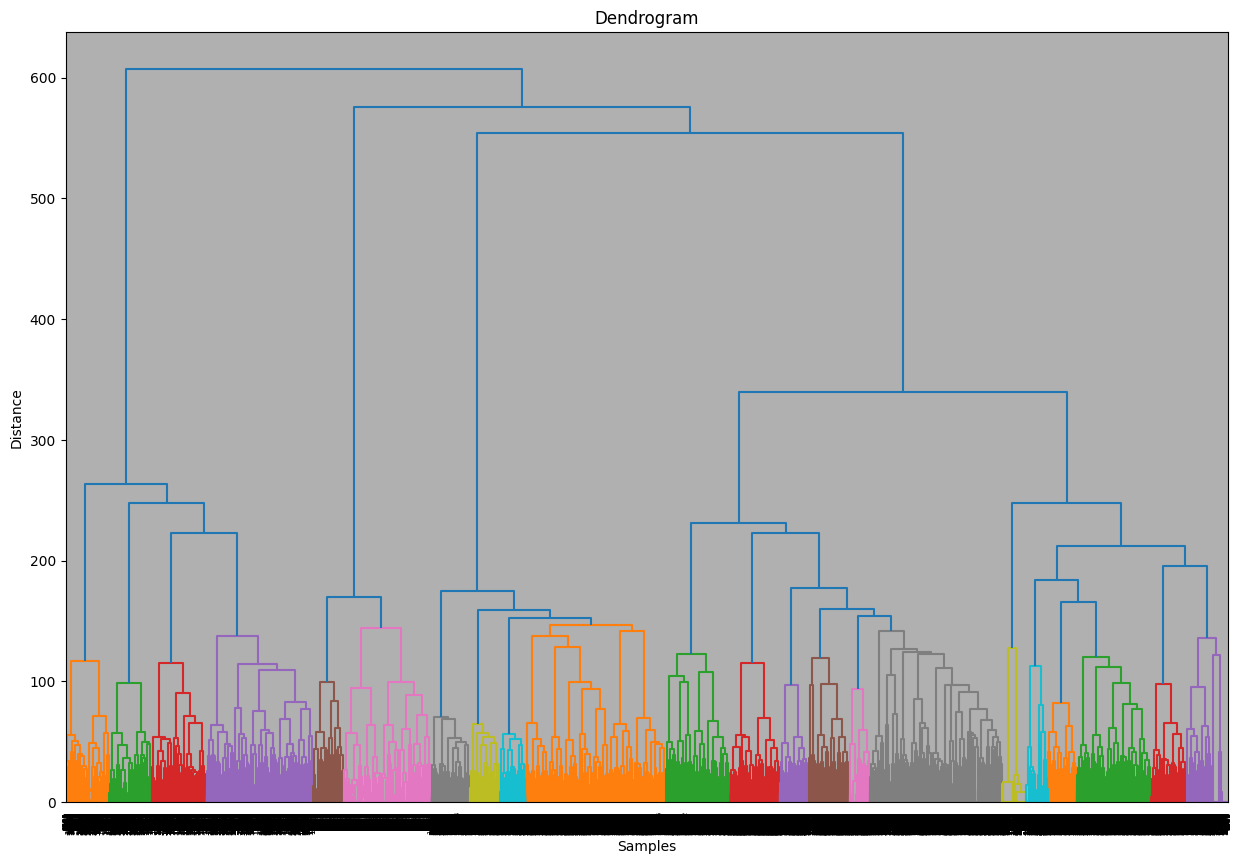

In [13]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# 덴드로그램 시각화 (계층적 클러스터링)
linked = linkage(scaled_tfidf, method='ward')

plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top', distance_sort='ascending', show_leaf_counts=True, color_threshold=150)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

In [14]:
from sklearn.cluster import AgglomerativeClustering
# 덴드로그램에서 클러스터를 잘라내기 위해 특정 높이 설정

color_threshold = 150  # 이 값을 적절히 설정하여 클러스터 수를 조절
clusters = fcluster(linked, color_threshold, criterion='distance')

# 결정한 클러스터 수 출력
num_clusters = len(set(clusters))
print(f'Number of clusters determined from dendrogram: {num_clusters}')

# Agglomerative Clustering 수행
hierarchical = AgglomerativeClustering(n_clusters=num_clusters, metric='euclidean', linkage='ward')
cluster_labels = hierarchical.fit_predict(scaled_tfidf)
new_df['cluster'] = cluster_labels

# 클러스터링 결과 확인
print(new_df[['preprocessed_text', 'cluster']].head(10))


# 클러스터 수 및 각 클러스터에 속하는 포인트 수 확인
print(f'Number of clusters: {num_clusters}')
cluster_counts = pd.Series(cluster_labels).value_counts()

# 클러스터를 오름차순으로 정렬
sorted_cluster_counts = cluster_counts.sort_index()

# 결과 출력
print(sorted_cluster_counts)

Number of clusters determined from dendrogram: 22
                                   preprocessed_text  cluster
0  해운대구 배회 중인 김민호 남다 찾다 상의 검은색 후드 회색 계통 바지 검다 가방 ...        0
1  오늘 시 분경 거 제동 청마 마이 우스 오피스텔 층 화재 발생 차량 건물 주변 도로...        8
2  어등 대교 평동 청방 항 차로 신축 이음 장치 파손 현재 긴급 복구 중 교통 매우 ...        8
3  서구 주민 허조 배씨 남다 찾다 중절모 베이지색 점퍼 검정 바지 희다 슬리퍼 희다 ...        0
4  중랑구 주민 강명운 남다 찾다 통통 백발 검정 패딩 검정 기다 바지 갈색 슬리퍼 서...       15
5      도봉구 주민 임용 택 남다 찾다 검정 점퍼 검정 바지 검정 모자 등산 서울 경찰청        0
6  군포시 실종 되다 영희 세 찾다 짧다 단발 파마 줄무늬 기다 상의 바지 경기 남부 경찰청       15
7     중구 목격 되다 음 영희 세 찾다 빨강 스웨터 검정 바지 분홍색 털모자 서울 경찰청        0
8  영등포구 배회 중인 황민준 남다 찾다 체크 무늬 후드 티셔츠 회색 바지 베낭 롯데 ...        0
9        동래구 주민 유탁 남다 찾다 검정색 패딩 검정색 모자 검정색 바지 부산 경찰청        0
Number of clusters: 22
0     2641
1     1658
2     2481
3      452
4     1998
5      766
6      400
7     1397
8     1214
9     1037
10     932
11     822
12     676
13     796
14     542
15     721
16     570
17     553
18     766
19     566
20     384
21     468
Nam

In [15]:
new_df

,preprocessed_text,cluster
0,해운대구 배회 중인 김민호 남다 찾다 상의 검은색 후드 회색 계통 바지 검다 가방 ...,0
1,오늘 시 분경 거 제동 청마 마이 우스 오피스텔 층 화재 발생 차량 건물 주변 도로...,8
2,어등 대교 평동 청방 항 차로 신축 이음 장치 파손 현재 긴급 복구 중 교통 매우 ...,8
3,서구 주민 허조 배씨 남다 찾다 중절모 베이지색 점퍼 검정 바지 희다 슬리퍼 희다 ...,0
4,중랑구 주민 강명운 남다 찾다 통통 백발 검정 패딩 검정 기다 바지 갈색 슬리퍼 서...,15
...,...,...
21835,부산시 부산 지역 호우 주의보 발효 외출 자제 하천 변 지대 위험 지역 출입 삼가다...,17
21836,의령군 현재 의령군 의령읍 정암 리만 천리 지방도 호선 정암 철교 수협 사료 삼거리...,8
21837,북구 지속 되다 호우 수위 높아지다 대천천 산책로 화 생태 공원 산책로 차량 진출 ...,7
21838,행정안전부 많다 비 내리다 대중교통 이용 하다 운전 시 지하차도 지대 침수 우려 속...,7


#### 클러스터별 내용 정리

- Cluster 0
키워드: 검정, 경찰청, 남다, 되다, 모자, 바지, 실종, 운동화, 주민, 찾다
내용: 실종자와 관련된 정보를 제공하는 내용으로, 특정 인물의 외형적 특징(예: '운동화', '검정 바지')을 설명하며 실종자의 신속한 발견을 요청하는 메시지가 포함됩니다.

- Cluster 1
키워드: 구명조끼, 금지, 물놀이, 바라다, 보호자, 안전, 어린이, 음주, 준수, 착용
내용: 물놀이 관련 안전 수칙에 대한 경고 및 권고 사항. 주요 내용으로는 구명조끼 착용, 음주 금지, 보호자 감독 등이 포함됩니다.

- Cluster 2
키워드: 되다, 바라다, 발생, 사고, 안전, 오늘, 유의, 자제, 주의, 하다
내용: 사고 발생에 대한 경고 메시지와 안전 수칙 준수 요청. '유의'와 '자제'와 같은 키워드로 주의를 환기하는 내용입니다.

- Cluster 3
키워드: 가지, 계곡, 급경사, 말다, 수로, 위험, 주변, 지역, 하다, 하천
내용: 계곡이나 하천 주변의 급경사와 같은 위험 요소에 대한 경고와 주의 요청. 하천 지역 방문 시 사고를 예방하기 위한 조언이 포함됩니다.

- Cluster 4
키워드: 바라다, 섭취, 야외, 유의, 자제, 충분하다, 폭염, 하다, 활동, 휴식
내용: 폭염과 관련된 건강 관리 주의사항. 야외 활동을 자제하고 충분한 휴식을 취하며, 폭염으로 인한 건강 문제를 예방하기 위한 메시지가 포함됩니다.

- Cluster 5
키워드: 폐쇄, 도로, 구간, 정체, 통제, 하다, 현재, 우회, 차단, 진행
내용: 특정 도로 구간의 폐쇄 또는 통제와 관련된 알림. 도로 정체 상황과 우회 경로에 대한 안내를 포함하여 교통 상황을 전달합니다.

- Cluster 6
키워드: 바라다, 조심, 발생, 주의, 보행자, 차량, 안전, 유의, 하다, 속도
내용: 교통 안전과 관련된 주의 사항. 보행자 안전, 차량 속도 제한 등 도로에서의 안전 수칙을 권고합니다.

- Cluster 7
키워드: 마스크, 착용, 실내, 바라다, 손, 씻다, 거리, 유지, 하다, 코로나
내용: 코로나19와 관련된 방역 수칙 안내. '마스크 착용', '손 씻기', '거리 두기' 등 감염 예방을 위한 기본 수칙을 강조합니다.

- Cluster 8
키워드: 하다, 강수량, 예상, 시간, 주의, 유의, 오늘, 지역, 발생, 비
내용: 비와 관련된 기상 정보와 주의사항. 강수량 예보와 관련 위험 요소를 알리고, 지역 주민들에게 대비를 요청합니다.

- Cluster 9
키워드: 음식물, 쓰레기, 처리, 방법, 규정, 분리, 안내, 배출, 하다, 환경
내용: 음식물 쓰레기 처리 및 분리 배출과 관련된 지침. 올바른 방법과 규정을 안내하여 환경 보호를 장려합니다.

- Cluster 10
키워드: 침수, 발생, 지역, 피해, 도로, 대비, 하다, 복구, 유의, 장비
내용: 침수 피해와 관련된 대비 및 복구 안내. 침수 지역 주민들에게 유의 사항을 전달하며, 장비 준비를 강조합니다.

- Cluster 11
키워드: 구간, 통제, 하다, 공사, 도로, 완료, 폐쇄, 진행, 우회, 안내
내용: 도로 공사와 관련된 안내 메시지로, 특정 구간의 폐쇄와 우회로 정보를 제공합니다.

- Cluster 12
키워드: 산불, 발생, 주의, 지역, 하다, 예방, 유의, 조치, 알림, 대비
내용: 산불 예방과 관련된 주의사항 및 발생 시 조치. 지역 주민들에게 대비를 요청합니다.

- Cluster 13
키워드: 하다, 전력, 복구, 정전, 지역, 발생, 유의, 예상, 완료, 지원
내용: 정전과 관련된 안내 메시지로, 복구 예상 시간과 유의 사항을 전달합니다.

- Cluster 14
키워드: 전염병, 예방, 주의, 유의, 하다, 백신, 증상, 감염, 발생, 대응
내용: 전염병 관련 예방 조치 안내 및 백신 접종 권고. 감염 예방을 위한 메시지가 포함됩니다.

- Cluster 15
키워드: 위험, 주변, 유의, 지역, 발생, 하다, 구조, 구출, 조심, 주민
내용: 특정 지역에서 발생 가능한 위험 상황과 관련된 경고 메시지. 구조와 구출 활동이 포함될 수 있습니다.

- Cluster 16
키워드: 안전, 사고, 발생, 조심, 주의, 하다, 오늘, 대비, 조치, 경고
내용: 사고와 관련된 경고 및 예방 안내. 대비와 조치 방법을 전달합니다.

- Cluster 17
키워드: 방역, 소독, 지역, 하다, 주민, 예방, 안내, 실행, 조치, 유의
내용: 방역 및 소독과 관련된 안내 메시지. 예방 활동과 실행 방안을 전달합니다.

- Cluster 18
키워드: 구조물, 붕괴, 안전, 발생, 조심, 대비, 하다, 지역, 주의, 유의
내용: 구조물 붕괴 위험과 관련된 경고 및 예방 메시지. 안전 점검과 대비를 요청합니다.

- Cluster 19
키워드: 범죄, 예방, 주의, 발생, 유의, 신고, 조치, 안전, 지역, 경찰
내용: 범죄 예방과 관련된 메시지로, 신고 방법과 주의 사항을 안내합니다.

- Cluster 20
키워드: 하다, 진압, 불, 화재, 발생, 조치, 안전, 지역, 예방, 대응
내용: 화재와 관련된 경고 및 대응 메시지. 화재 발생 시 대처 방법과 예방 조치를 전달합니다.

- Cluster 21
키워드: 주민, 찾다, 하다, 요청, 실종, 알림, 대비, 경고, 조치, 주의
내용: 주민의 안전과 관련된 정보 전달. 실종자 찾기와 관련된 안내 메시지가 포함됩니다.

## 클러스터 병합

In [16]:
# 1. cluster 5 , cluster 11 병합

# Cluster 5:
# 키워드: 폐쇄, 도로, 구간, 정체, 통제, 하다, 현재, 우회, 차단, 진행
# 내용: 도로 구간 폐쇄 또는 통제 관련 메시지. 우회 경로 안내 포함.
# Cluster 11:
# 키워드: 구간, 통제, 하다, 공사, 도로, 완료, 폐쇄, 진행, 우회, 안내
# 내용: 도로 공사 관련 메시지로 특정 구간의 폐쇄 및 우회 안내 포함.

# -> 두 클러스터는 도로 상황 안내를 중심으로 하며, 폐쇄 구간 및 우회로 정보 제공이라는 공통된 주제를 공유

# 2. cluster 12, cluster 20 병합

# Cluster 12:
# 키워드: 산불, 발생, 주의, 지역, 하다, 예방, 유의, 조치, 알림, 대비
# 내용: 산불 예방 및 발생 시 조치 방법에 대한 안내.
# Cluster 20:
# 키워드: 하다, 진압, 불, 화재, 발생, 조치, 안전, 지역, 예방, 대응
# 내용: 화재 예방 및 진압과 관련된 경고 및 대응 메시지.

# -> 두 클러스터 모두 화재(산불 포함) 관련 메시지를 다루며, 예방과 대응 방법이라는 공통된 주제를 공유

# 3. cluster 15, cluster 16 병합
# Cluster 15:
# 키워드: 위험, 주변, 유의, 지역, 발생, 하다, 구조, 구출, 조심, 주민
# 내용: 특정 지역에서 발생 가능한 위험 상황에 대한 경고 메시지.
# Cluster 16:
# 키워드: 안전, 사고, 발생, 조심, 주의, 하다, 오늘, 대비, 조치, 경고
# 내용: 사고와 관련된 경고 및 예방 메시지. 대비와 조치 방법 포함.

# -> 두 클러스터 모두 위험과 사고에 대한 경고 메시지를 다루며, 예방 및 대비를 강조

# 4. cluster 0 , cluster 21 병합
# Cluster 0:
# 키워드: 검정, 경찰청, 남다, 되다, 모자, 바지, 실종, 운동화, 주민, 찾다
# 내용: 실종자 정보와 관련된 메시지. 특정 인물의 외형적 특징 설명 및 발견 요청.
# Cluster 21:
# 키워드: 주민, 찾다, 하다, 요청, 실종, 알림, 대비, 경고, 조치, 주의
# 내용: 주민 안전과 관련된 메시지. 실종자 찾기와 관련된 안내 포함.

# 5. Cluster 1, Cluster 3 병합
# Cluster 1:
# 키워드: 구명조끼, 금지, 물놀이, 바라다, 보호자, 안전, 어린이, 음주, 준수, 착용
# 내용: 물놀이 안전 수칙 관련 경고 메시지. 구명조끼 착용, 음주 금지 등의 행동 권고 포함.
# Cluster 3:
# 키워드: 가지, 계곡, 급경사, 말다, 수로, 위험, 주변, 지역, 하다, 하천
# 내용: 계곡, 하천 등에서의 사고 예방 관련 메시지. 급경사와 같은 위험 요소에 대한 경고 포함.

# -> 두 클러스터 모두 자연환경에서의 위험을 경고하며, 안전 수칙 준수(Cluster 1)와 사고 예방 권고(Cluster 3)라는 유사한 목표를 공유합니다.

In [17]:
# 14번 클러스터가 클러스터링 잘안됨.


In [18]:
# 새로운 클러스터 열 생성 (기존 클러스터를 복사)
new_df['merged_cluster'] = new_df['cluster']

# 1. Cluster 1과 3 병합: 자연환경 안전 관련 , 물놀이 주의 호우주의
new_df.loc[new_df['cluster'].isin([1, 3]), 'merged_cluster'] = 30

# 2. Cluster 5와 11 병합: 도로 폐쇄 및 통제 관련
new_df.loc[new_df['cluster'].isin([5, 11]), 'merged_cluster'] = 31

# 3. Cluster 12와 20 병합: 화재 및 산불 관련
new_df.loc[new_df['cluster'].isin([12, 20, 17]), 'merged_cluster'] = 32

# 4. Cluster 15와 16 19 병합: 위험 및 사고 경고 관련
new_df.loc[new_df['cluster'].isin([15, 16, 19, 6]), 'merged_cluster'] = 33

# 5. Cluster 0과 21 병합: 실종자 정보 전달 관련
new_df.loc[new_df['cluster'].isin([0, 21]), 'merged_cluster'] = 34

# 6. cluster 7과 14 병합 , 감염 관련
new_df.loc[new_df['cluster'].isin([7, 14]), 'merged_cluster'] = 35


# 결과 확인
print(new_df['merged_cluster'].value_counts())


merged_cluster
34    3109
2     2481
33    2257
30    2110
4     1998
35    1939
32    1613
31    1588
8     1214
9     1037
10     932
13     796
18     766
Name: count, dtype: int64


In [19]:
# merged_cluster 열을 기준으로 오름차순 정렬
sorted_df = new_df.sort_values(by='merged_cluster', ascending=True)

# 정렬된 결과 확인
sorted_df

,preprocessed_text,cluster,merged_cluster
11715,금일 분경 보성강 댐 증가 방류 실시 예정 인근 주민 하천 변 위험 지역 접근 금지...,2,2
14716,짙다 안개 가시거리 매우 짧다 운 전시 감속 주행 비상등 점멸 교통 안전 유의 하다...,2,2
14717,짙다 안개 가시거리 매우 짧다 운 전시 감속 주행 비상등 점멸 교통 안전 유의 하다...,2,2
14718,짙다 안개 가시거리 매우 짧다 운 전시 감속 주행 비상등 점멸 교통 안전 유의 하다...,2,2
14719,짙다 안개 인하다 가시거리 매우 짧다 교통사고 발생 위험 운 전시 감속 주행 비상등...,2,2
...,...,...,...
19657,경주시 오늘 밤 시 한파 주의보 발효 야외 활동 자제 하다 난방 온도 관리 유의 하...,14,35
19656,서구 오늘 밤 시 한파 주의보 발효 되다 예정 노약 야외 활동 자제 하다 전기장판 ...,14,35
15851,오늘 시 분경 합천군 율곡면 와리 케미칼 공장 화재 발생 확산 우려 되다 인근 주민...,14,35
7669,오늘 부산 부지역 호우 주의보 발효 지대 침수 위험 지역 접근 금지 외출 자제 안전...,7,35


In [20]:
# 17번 호우로 안전 유의 관련
# -> 추가 cluster 32에 합침

In [21]:
new_df.drop(columns = ['cluster'], inplace=True)


In [22]:
new_df

,preprocessed_text,merged_cluster
0,해운대구 배회 중인 김민호 남다 찾다 상의 검은색 후드 회색 계통 바지 검다 가방 ...,34
1,오늘 시 분경 거 제동 청마 마이 우스 오피스텔 층 화재 발생 차량 건물 주변 도로...,8
2,어등 대교 평동 청방 항 차로 신축 이음 장치 파손 현재 긴급 복구 중 교통 매우 ...,8
3,서구 주민 허조 배씨 남다 찾다 중절모 베이지색 점퍼 검정 바지 희다 슬리퍼 희다 ...,34
4,중랑구 주민 강명운 남다 찾다 통통 백발 검정 패딩 검정 기다 바지 갈색 슬리퍼 서...,33
...,...,...
21835,부산시 부산 지역 호우 주의보 발효 외출 자제 하천 변 지대 위험 지역 출입 삼가다...,32
21836,의령군 현재 의령군 의령읍 정암 리만 천리 지방도 호선 정암 철교 수협 사료 삼거리...,8
21837,북구 지속 되다 호우 수위 높아지다 대천천 산책로 화 생태 공원 산책로 차량 진출 ...,35
21838,행정안전부 많다 비 내리다 대중교통 이용 하다 운전 시 지하차도 지대 침수 우려 속...,35


In [23]:
new_df2 = new_df.sort_index().rename(columns={'merged_cluster': 'label'})
new_df2 # 라벨링한 데이터프레임

,preprocessed_text,label
0,해운대구 배회 중인 김민호 남다 찾다 상의 검은색 후드 회색 계통 바지 검다 가방 ...,34
1,오늘 시 분경 거 제동 청마 마이 우스 오피스텔 층 화재 발생 차량 건물 주변 도로...,8
2,어등 대교 평동 청방 항 차로 신축 이음 장치 파손 현재 긴급 복구 중 교통 매우 ...,8
3,서구 주민 허조 배씨 남다 찾다 중절모 베이지색 점퍼 검정 바지 희다 슬리퍼 희다 ...,34
4,중랑구 주민 강명운 남다 찾다 통통 백발 검정 패딩 검정 기다 바지 갈색 슬리퍼 서...,33
...,...,...
21835,부산시 부산 지역 호우 주의보 발효 외출 자제 하천 변 지대 위험 지역 출입 삼가다...,32
21836,의령군 현재 의령군 의령읍 정암 리만 천리 지방도 호선 정암 철교 수협 사료 삼거리...,8
21837,북구 지속 되다 호우 수위 높아지다 대천천 산책로 화 생태 공원 산책로 차량 진출 ...,35
21838,행정안전부 많다 비 내리다 대중교통 이용 하다 운전 시 지하차도 지대 침수 우려 속...,35


## T-SNE로 시각화

In [24]:
from sklearn.manifold import TSNE
import seaborn as sns

tfidf_newdf2 = vectorizer.fit_transform(new_df2['preprocessed_text']).toarray()

# TSNE를 사용하여 2차원으로 축소
tsne_newdf2 = TSNE(n_components=2, random_state=42)
tsne_results_newdf2 = tsne_newdf2.fit_transform(tfidf_newdf2)

# 시각화를 위해 t-SNE 결과를 DataFrame으로 변환
tsne_df = pd.DataFrame({
    'TSNE1': tsne_results_newdf2[:, 0],
    'TSNE2': tsne_results_newdf2[:, 1],
    'label': new_df2['label']  # 라벨 정보 추가
})

# 시각화
plt.figure(figsize=(10, 8))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='label', palette=sns.color_palette("hsv", 8), data=tsne_df, legend="full", alpha=0.6)
plt.title('Hierarchical Clustering on TSNE-reduced TF-IDF')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


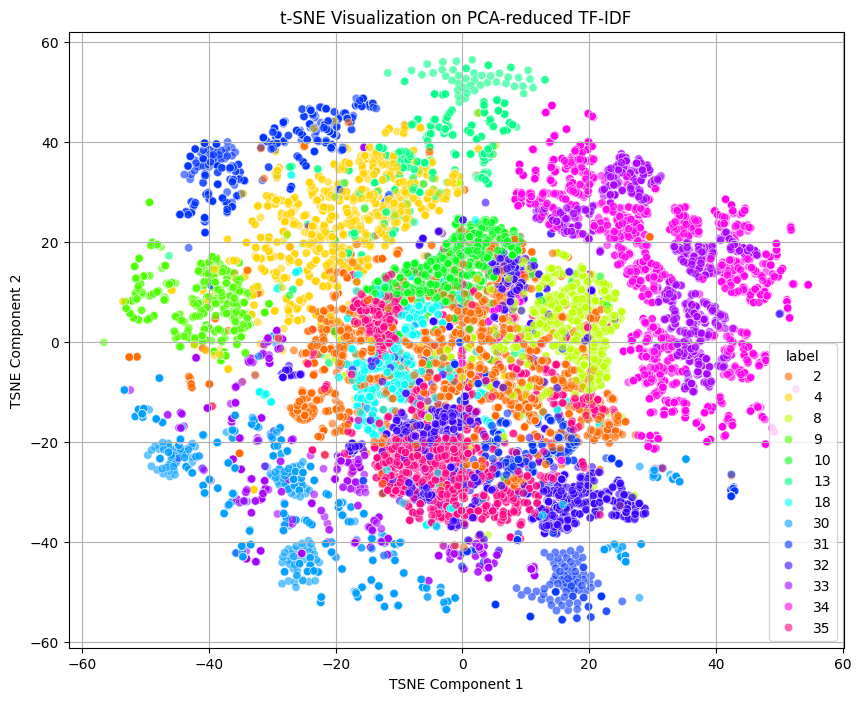

In [34]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

tfidf_newdf2 = vectorizer.fit_transform(new_df2['preprocessed_text']).toarray()


# PCA로 차원 축소 (50차원)
pca = PCA(n_components=50, random_state=42)
tfidf_pca = pca.fit_transform(tfidf_newdf2)

# TSNE로 2차원 축소
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=500)
tsne_results_newdf2 = tsne.fit_transform(tfidf_pca)

# DataFrame 변환
tsne_df = pd.DataFrame({
    'TSNE1': tsne_results_newdf2[:, 0],
    'TSNE2': tsne_results_newdf2[:, 1],
    'label': new_df2['label']
})

# 시각화
plt.figure(figsize=(10, 8))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='label', palette=sns.color_palette("hsv", len(tsne_df['label'].unique())), data=tsne_df, legend="full", alpha=0.6)
plt.title('t-SNE Visualization on PCA-reduced TF-IDF')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.grid(True)
plt.show()


In [39]:
new_df2.to_csv('/content/drive/MyDrive/2024_3학년_2학기/데이터마이닝과파이썬프로그래밍/new_df.csv', index=False)